## 1. Introduzione e Installazione

#### Import Numpy - Pandas - Matplotlib

In [99]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
np.version.version

'1.23.4'

In [101]:
pd.__version__

'1.5.1'

#### Leggere il CSV dal DataSet (csv) originale

In [102]:
df = pd.read_csv('CSV/pokedex_(Update_05.20).csv', index_col=0)
sns.set()

#### Mostrare il DataSet appena importato

In [103]:
df.head(5)
df.columns

Index(['pokedex_number', 'name', 'german_name', 'japanese_name', 'generation',
       'status', 'species', 'type_number', 'type_1', 'type_2', 'height_m',
       'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

## 2. Fruizione dei primi Dati

#### Selezionare ed eliminare le colonne che NON volgio avere nel mio DataSet

In [104]:
col_names = [
    'pokedex_number', 'name', 'generation',
    'status', 'type_number', 'type_1',
    'type_2', 'height_m', 'weight_kg',
    'abilities_number', 'ability_1', 'ability_2',
    'ability_hidden', 'total_points', 'hp',
    'attack', 'defense', 'sp_attack',
    'sp_defense', 'speed', 'base_experience', 'catch_rate'
]
filtered_pokemon_data = pd.DataFrame(df, columns=col_names)
filtered_pokemon_data.head(5)

,pokedex_number,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience,catch_rate
0,1,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,2,...,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,64.0,45.0
1,2,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,2,...,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,142.0,45.0
2,3,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,2,...,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,236.0,45.0
3,3,Mega Venusaur,1,Normal,2,Grass,Poison,2.4,155.5,1,...,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,281.0,45.0
4,4,Charmander,1,Normal,1,Fire,NaN,0.6,8.5,2,...,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,62.0,45.0


#### Aggiungo una colonna con gli anni in relazione alla generazione 
- La prima uscii nel 1996
- La secona uscii nel 1999
- La terza uscii nel 2002
- La quarta uscii nel 2006
- La quinta uscii nel 2010
- La sesta uscii nel 2013
- La settima uscii nel 2016
- L' ottava uscii nel 2019

##### Prendo da un altro DataSet UNA colonna che mi interessa
##### Unisco i due DataSet in uno nuovo esportato in CSV

In [105]:
# Linking genreration number to publish date (JP)
years = [1996, 1999, 2002, 2006, 2010, 2013, 2016, 2019]

# inserisco la colonna (sarà la 3°) che si chiamerà date_published passandoli come valore il mapping dato dal
# dizionario creato con enumerate (con lista di anni e index)
filtered_pokemon_data.insert(2, column='date_published', value=filtered_pokemon_data.generation.map(dict(enumerate(years, start=1))))

df_2 = pd.read_csv('CSV/All_Pokemon.csv', index_col=0)
df_2.reset_index(inplace=True)
df_3 = pd.DataFrame(df_2['Experience to level 100'])
filtered_pokemon_data = pd.merge(filtered_pokemon_data, df_3, left_on=filtered_pokemon_data.index, right_index=True)

# --- TRY FATTI E FALLITI ---
# filtered_pokemon_data
# filtered_pokemon_data.insert(22, column='experience_to_100', value=experience_to_100[''])
# -- END TRY FATTI E FALLITI --
filtered_pokemon_data.to_csv('CSV/filtered_pokemon_data_years.csv', index=False)


## 3. Analisi Morfologica dei Pokemon

#### Ricerchiamo il Pokémon più leggero
##### Il peso minimo imposto da The Poekomon Company in KG è 0.1kg 

In [106]:
# get lightest
lightest = filtered_pokemon_data[['name', 'weight_kg']].sort_values(by = ['weight_kg'], ascending=True)

series1 = pd.DataFrame(
    {'Pokémon': lightest['name'], 'Peso KG': lightest['weight_kg'].values})
# only_lightest = series1[series1['Peso KG'] < 0.2]
only_lightest = series1.head(1)
only_lightest

# ci sono 5 Pokémon che pesano 0.1 (valore minimo nel "mondo" Pokémon)
# Prendo il primo tramite sliceing

,Pokémon,Peso KG
776,Flabébé,0.1


#### Ricerchiamo il Pokémon più pesante
##### Il peso massimo imposto da The Pokémon Company in KG è 999.9kg 

In [107]:
# get the heaviest
heaviest = filtered_pokemon_data[['name', 'weight_kg']].sort_values(by = ['weight_kg'], ascending=False)

series2 = pd.DataFrame(
    {'Pokémon': heaviest['name'], 'Peso KG': heaviest['weight_kg'].values})
# only_heaviest = series2[series2['Peso KG'] > 999.8]
only_heaviest = series2.head(1)
only_heaviest

# Ci sono 2 Pokémon che pesano 999.9 (valore massimo nel "mondo" Pokémon)
# Prendo il primo tramite sliceing

,Pokémon,Peso KG
924,Celesteela,999.9


#### Rierchiamo il Pokémon più veloce

In [108]:
# get the fastest
fastest = filtered_pokemon_data[['name', 'speed']].sort_values(by = ['speed'], ascending=False)
series3 = pd.DataFrame(
    {'Pokémon': fastest['name'], 'Velocità': fastest['speed'].values})
only_fastest = series3[:1]
only_fastest

,Pokémon,Velocità
463,Deoxys Speed Forme,180.0


#### Ricerchiamo il Pokémon più alto
##### L'altezza massima imposta da The Pokémon Company in m è 100.00m 

In [110]:
# get the tallest
tallest = filtered_pokemon_data[['name', 'height_m']].sort_values(by = ['height_m'], ascending=False)
series4 = pd.DataFrame(
    {'Pokémon': tallest['name'], 'Altezza in m': tallest['height_m'].values})
# only_tallest = series4[series4['height_m'] > 99.9]
only_tallest = series4.head(1)
only_tallest

,Pokémon,Altezza in m
1027,Eternatus Eternamax,100.0


#### Ricerchiamo il Pokémon più basso
##### L'altezza minima imposta da The Pokémon Company in m è 0.1m 

In [111]:
# get the smallest
smallest = filtered_pokemon_data[['name', 'height_m']].sort_values(by = ['height_m'], ascending=True)
series5 = pd.DataFrame(
    {'Pokémon': smallest['name'], 'Altezza in m': smallest['height_m'].values})
# only_smallest = series5[series5['height_m'] < 0.2]
only_smallest = series5.head(1)
only_smallest

# ci sono 6 Pokémon che hanno la stessa altezza (0.1 valore minimo nel "mondo" Pokémon
# prendo il primo tramite sliceing

,Pokémon,Altezza in m
864,Cutiefly,0.1


## 4. Analisi Dati Con Grafici

#### 4.1 Rappresentazione con grafico a barre di quanti Pokémon sono stati rilasciati per ogni generazione

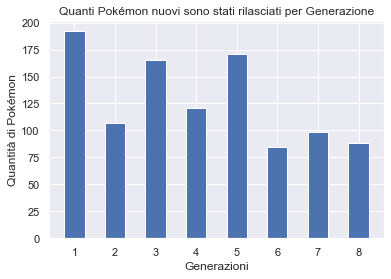

In [112]:
# vogliamo rappresentare quanti Pokémon sono stati rilasciati per ogni generazione, in questo caso 8,
from collections import Counter

generations = filtered_pokemon_data.generation.values.tolist()
generations = Counter(generations)
plt.title("Quanti Pokémon nuovi sono stati rilasciati per Generazione")
plt.xlabel('Generazioni')
plt.ylabel('Quantità di Pokémon')
plt.bar(generations.keys(), generations.values(), width=0.5,)
plt.savefig('images/pokemon_for_generation.png', dpi='figure', format='png')
plt.show()


#### 4.2 Grafico che mostra quante aggiunte di nuovi Pokémon ci sono state in ogni generazione (il punto 0 è 192 Pokémon della gen 1)

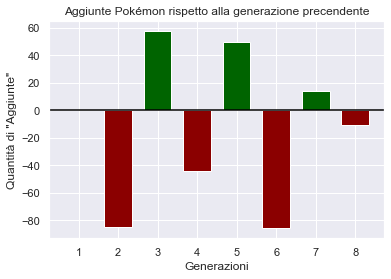

In [113]:
pippo_franco = list(generations.values())
pippo_franco.insert(0, pippo_franco[0])

result = [y - x for x, y in zip(pippo_franco, pippo_franco[1:])]


colors =[]
[colors.append('darkgreen') if r > 0 else colors.append('darkred') for r in result]
plt.bar(generations.keys(), result, width=0.7, color=colors)
plt.axhline(y=0, color='black')
plt.xlabel("Generazioni")
plt.ylabel('Quantità di "Aggiunte"')
plt.title("Aggiunte Pokémon rispetto alla generazione precendente")
plt.savefig('images/increment_new_pokemon_for_generation.png', dpi='figure', format='png')
plt.show()
# si evince come nelle genereazioni "dispari", prendendo come punto 0 il numero di Pokémon
# della generazione 1, si abbia un maggior incremento di Pokémon rispetto alle generazioni "pari"

In [114]:
generations

Counter({1: 192, 2: 107, 3: 165, 4: 121, 5: 171, 6: 85, 7: 99, 8: 88})

#### 4.3 Mettiamo a confronto l'incremento generazionale di Pokémon con quanti sono stati effettivamente aggiunti per generazione

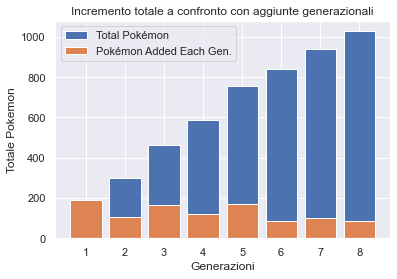

In [115]:
# Mettiamo a confronto l'incremento generazionale di Pokémon con quanti sono stati effettivamente
# aggiunti per generazione

pkmn_x_generation = pd.Series(generations.values())

total_pkmn_gen_to_gen = [pd.Series(list(generations.values())[:i]).sum() for i in generations.keys()]

plt.bar(generations.keys(),total_pkmn_gen_to_gen)
plt.bar(generations.keys(), generations.values())
plt.ylabel('Totale Pokemon')
plt.xlabel('Generazioni')
plt.grid(True, which='major', axis='y')
plt.legend(['Total Pokémon', 'Pokémon Added Each Gen.'])
plt.title("Incremento totale a confronto con aggiunte generazionali")
plt.savefig('images/increment_new_pokemon_each_gen.png', dpi='figure', format='png')

plt.show()

In [116]:
filtered_pokemon_data

,key_0,pokedex_number,name,date_published,generation,status,type_number,type_1,type_2,height_m,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,base_experience,catch_rate,Experience to level 100
0,0,1,Bulbasaur,1996,1,Normal,2,Grass,Poison,0.7,...,318.0,45.0,49.0,49.0,65.0,65.0,45.0,64.0,45.0,1059860
1,1,2,Ivysaur,1996,1,Normal,2,Grass,Poison,1.0,...,405.0,60.0,62.0,63.0,80.0,80.0,60.0,142.0,45.0,1059860
2,2,3,Venusaur,1996,1,Normal,2,Grass,Poison,2.0,...,525.0,80.0,82.0,83.0,100.0,100.0,80.0,236.0,45.0,1059860
3,3,3,Mega Venusaur,1996,1,Normal,2,Grass,Poison,2.4,...,625.0,80.0,100.0,123.0,122.0,120.0,80.0,281.0,45.0,1059860
4,4,4,Charmander,1996,1,Normal,1,Fire,NaN,0.6,...,309.0,39.0,52.0,43.0,60.0,50.0,65.0,62.0,45.0,1059860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,1023,888,Zacian Hero of Many Battles,2019,8,Legendary,1,Fairy,NaN,2.8,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,1250000
1024,1024,889,Zamazenta Crowned Shield,2019,8,Legendary,2,Fighting,Steel,2.9,...,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,1250000
1025,1025,889,Zamazenta Hero of Many Battles,2019,8,Legendary,1,Fighting,NaN,2.9,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,1250000
1026,1026,890,Eternatus,2019,8,Legendary,2,Poison,Dragon,20.0,...,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,1250000


#### 4.4 Ricerchiamo qual è il Tipo Primario più comune tra:

| --------------------------- |
| Normale | Volante | Elettro |
| Erba | Fuoco | Acqua |
| Lotta | Veleno | Spettro |
| Roccia | Terra | Coleottero |
| Psico | Acciaio | Ghiaccio |
| Buio | Drago |

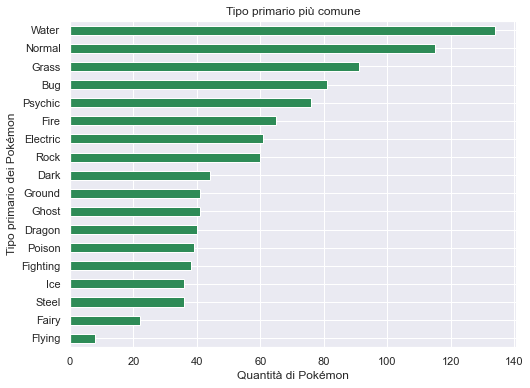

In [117]:
pokemon_for_type = filtered_pokemon_data.groupby("type_1")["name"].count()
pokemon_for_type_sorted = pokemon_for_type.sort_values(ascending=True).plot(kind="barh", color= 'seagreen', figsize=(8, 6))

plt.ylabel('Tipo primario dei Pokémon')
plt.xlabel('Quantità di Pokémon')
plt.title("Tipo primario più comune")
plt.savefig('images/most_common_first_type.png', dpi='figure', format='png')
plt.show()

# Si evince come il tipo dominante di pokemon è il tipo Acqua, per un team ottimale, avere un tipo "Elettro", 
# in media aumenta la probabilità di vincere 

#### 4.4 Ricerchiamo qual è il Tipo Secondario più comune tra:
| --------------------------- |
| Normale | Volante | Elettro |
| Erba | Fuoco | Acqua |
| Lotta | Veleno | Spettro |
| Roccia | Terra | Coleottero |
| Psico | Acciaio | Ghiaccio |
| Buio | Drago |

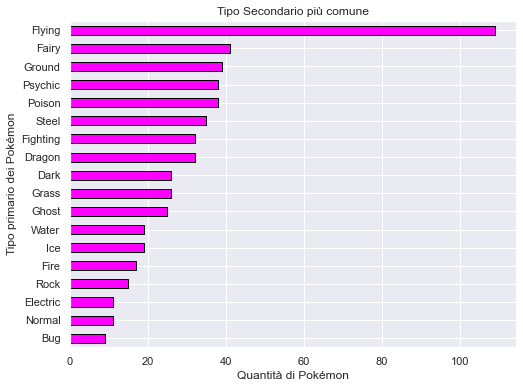

In [118]:
pokemon_for_type_2 = filtered_pokemon_data.groupby("type_2")['name'].count()
pokemon_for_type_2_sorted = pokemon_for_type_2.sort_values(ascending=True).plot(kind="barh", color='fuchsia', edgecolor='black', figsize=(8, 6))

plt.ylabel('Tipo primario dei Pokémon')
plt.xlabel('Quantità di Pokémon')
plt.title("Tipo Secondario più comune")
plt.savefig('images/most_common_second_type.png', dpi='figure', format='png')
plt.show()

# il tipo secondario più comune è il tipo volante, che tra l'altro è il tipo primario meno diffuso

## Pokémon più potente e più debole a confronto per ogni generazione

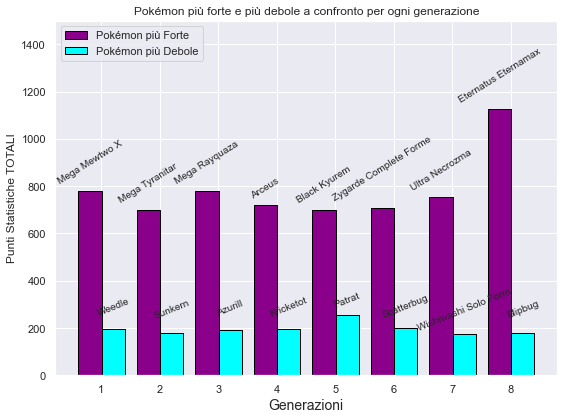

In [122]:
from itertools import chain

# Ordino i pokemon per generazione e per punteggio totale
sorted_by_gen_and_total_points = filtered_pokemon_data.sort_values(by=['generation', 'total_points'], ascending=[True, False])

# creo un dizionario con chiavi che vanno da 1 a 8 (generazioni),
# i valori sono una lista con il migliore e il peggiore per ogni gen
my_dict = dict((k, 
                [
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['total_points'].head(1).values),
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['total_points'].tail(1).values)
                ]
                ) for k in sorted_by_gen_and_total_points['generation'].unique())

# creo sempre un dizionario con chiavi (generazioni),
# i valori una lista con i nomi del + forte e il + debole

my_labels = dict((k, 
                [
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['name'].head(1).values),
                    *list(sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == k]['name'].tail(1).values)
                ]
                ) for k in sorted_by_gen_and_total_points['generation'].unique())

# Creo una serie per solo i valori e i nome a partire dai miei 2 dizionari
my_s = pd.Series(my_dict)
my_l = pd.Series(my_labels)


# inizializzo delle liste vuote d'appoggio per best - worst e le relative label
temp_b = []
temp_w = []
temp_b_l = []
temp_w_l = []

# aggiungo ai valori della lista temporanea, tutti i valori iterando sulle chiavi del mio dizionario
# inizializzando una nuova lista
best1 = [temp_b + [my_s[i][0]] for i in my_dict.keys()]
worst1 = [temp_w + [my_s[i][1]] for i in my_dict.keys()]
best_labels = [temp_b_l + [my_l[i][0]] for i in my_dict.keys()]
worst_labels = [temp_w_l + [my_l[i][1]] for i in my_dict.keys()]


# unpacco tramite chain la lista degli elementi in best e worst label e li concateno in una lista unica
# DA [
#        ['Mega Mewtwo X'], ['Mega Tyranitar'],
#        ['Mega Rayquaza'], ['Arceus'],
#        ['Black Kyurem'], ['Zygarde Complete Forme'],
#        ['Ultra Necrozma']['Eternatus Eternamax']
#    ]
# A  [
#         'Mega Mewtwo X', 'Mega Tyranitar',
#         'Mega Rayquaza', 'Arceus',
#         'Black Kyurem', 'Zygarde Complete Forme',
#         'Ultra Necrozma', 'Eternatus Eternamax'
#     ]
best_label_unpacked = list(chain(*best_labels))
worst_label_unpacked = list(chain(*worst_labels))

# -----GROUPED BAR CHART-----

col_width = 0.4

# prima barra è l'asse x (con le generazioni)(prendo la lunghezza di best 1 (0,7) +1
bar1 = np.arange(len(best1))+1
# da dove parte la barra 2 --> sommi alla posizione della prima colonna la larghezza della stessa e diventa
# la posizione dove disegnare la colonna 2
bar2 = [i + col_width for i in bar1]

# creo separatamente le 2 barre per il grafico:
fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(bar1, [best1[i][0] for i in range(len(best1))], col_width,
                color='darkmagenta', edgecolor='black')
rects2 = ax.bar(bar2, [worst1[i][0] for i in range(len(best1))], col_width,
                color='aqua', edgecolor='black')

ax.set_ylabel('Punti Statistiche TOTALI')
ax.set_xlabel('Generazioni', fontsize=14)
ax.set_title('Pokémon più forte e più debole a confronto per ogni generazione')
ax.set_xticks(bar1 + col_width/2.07, bar1)
ax.legend(["Pokémon più Forte", "Pokémon più Debole"], loc='upper left')
ax.set_ylim(0,1500)

ax.bar_label(rects1, labels=best_label_unpacked, padding=5, fontsize=10, rotation=32)
ax.bar_label(rects2, labels=worst_label_unpacked,
             padding=45, fontsize=10, label_type='center', rotation=22)
fig.tight_layout()
plt.show()

##### Tutti i tentativi fatti per rendere parametrizzato il grafico

In [123]:
# TUTTI I TRY FATTI

# Non era molto conveniente e per niente pythonico
#
# only_gen_1 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 1]
# only_gen_2 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 2]
# only_gen_3 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 3]
# only_gen_4 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 4]
# only_gen_5 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 5]
# only_gen_6 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 6]
# only_gen_7 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 7]
# only_gen_8 = sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation'] == 8]

# l_1 = list(only_gen_1['total_points'].head(1).values)
# l_2 = list(only_gen_2['total_points'].head(1).values)
# l_3 = list(only_gen_3['total_points'].head(1).values)
# l_4 = list(only_gen_4['total_points'].head(1).values)
# l_5 = list(only_gen_5['total_points'].head(1).values)
# l_6 = list(only_gen_6['total_points'].head(1).values)
# l_7 = list(only_gen_7['total_points'].head(1).values)
# l_8 = list(only_gen_8['total_points'].head(1).values)

# w_1 = list(only_gen_1['total_points'].tail(1).values)
# w_2 = list(only_gen_2['total_points'].tail(1).values)
# w_3 = list(only_gen_3['total_points'].tail(1).values)
# w_4 = list(only_gen_4['total_points'].tail(1).values)
# w_5 = list(only_gen_5['total_points'].tail(1).values)
# w_6 = list(only_gen_6['total_points'].tail(1).values)
# w_7 = list(only_gen_7['total_points'].tail(1).values)
# w_8 = list(only_gen_8['total_points'].tail(1).values)


# best_worst = pd.DataFrame
# a = list(my_dict.values()[i][0])
# print(list(my_dict.values()))
# print(list(my_dict.values())[1][0])
# best = [my_s[1][0], my_s[2][0], my_s[3][0],my_s[4][0], my_s[5][0], my_s[6][0], my_s[7][0], my_s[8][0]]
# for i in range(my_s.index):
#     best = best + [my_s[i][0]]
# best = [
#     my_s[1][0], my_s[2][0], my_s[3][0], my_s[4][0],
#     my_s[5][0], my_s[6][0], my_s[7][0], my_s[8][0]
# ]
# worst = [
#     my_s[1][1], my_s[2][1], my_s[3][1], my_s[4][1],
#     my_s[5][1], my_s[6][1], my_s[7][1], my_s[8][1]
# ]
# best_v = best.astype(int)
# worst_v = worst.astype(int)
#
#
# TOTALE FALLIMENTO DI RENDERE LE COSE PIU' PYTHONICHE
# df_gens = pd.concat([only_gen_1, only_gen_2], axis=0)
#
# df_gens

# best_gen_1 = only_gen_1.head(1)
# worst_gen_1 = only_gen_1.tail(1)

# dobbiamo generare per ogni generazione una variabile "only_gen_<numero-gen>


# altro generatore per prendere per ogni generazione il best e il worst
# concatenare
# df_worst_best = pd.DataFrame
# [df_worst_best.map(dict(enumerate(only_gen_1.head(1), only_gen_1.tail(1)))) if sorted_by_gen_and_total_points[sorted_by_gen_and_total_points['generation']] == i else None for i in range(1,9)]

# pd1 = pd.DataFrame
# pd1.apply(pd.concat([best_gen_1, worst_gen_1]))

# pd1 = pd.join([only_gen_1[['name', 'total_points']].iloc[0],only_gen_1[['name', 'total_points']].iloc[-1]])
#
# best_worst = pd.concat([pd1])
# best_worst
#
# FINE FALLIMENTO TOTALE


#### Il miglior pokemon e il peggiore tra tutte le generazioni


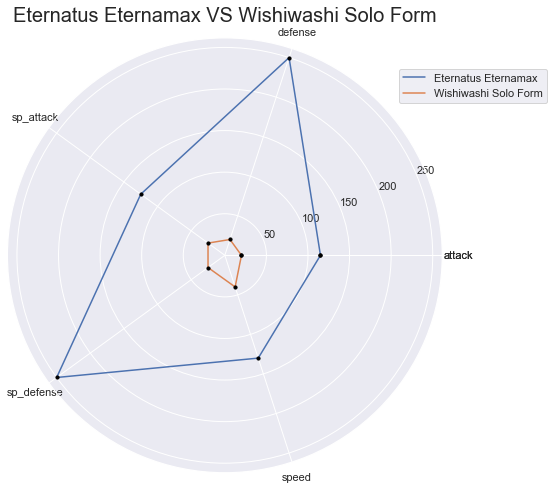

In [124]:
# Inizializzo una lista per fare una sorta di query per le colonne
categories_to_query = ['name', 'total_points','attack', 'defense',
              'sp_attack', 'sp_defense', 'speed']

# Inizializzo una nuova lista con solo le colonne che utilizzerò per il grafico
categories_to_show = ['attack', 'defense','sp_attack', 'sp_defense', 'speed']
# per il grafico radar, devo duplicare la prima categoria, in questo caso 'attack', e metterla al primo posto
# tutto ciò è per far chiudere il grafico (ci sono altri modi, ma per adesso questo è quello funzionante che ho trovato)
categories_to_show = [*categories_to_show, categories_to_show[0]]

# Creo un DF dove prendo solo le colonne che mi interessano con categories_to_query
# li ordino per 'total_points' in ordine decrescente
# prendo la prima entry
best_pokemon = pd.DataFrame(filtered_pokemon_data[categories_to_query].sort_values(
    by=['total_points'], ascending=False).head(1))
# Prendo anche il suo nome e lo casto a stringa per eseguire l'unpacking
best_pokemon_label = str(*best_pokemon['name'])

# stesssa cosa per il pokemon peggiore
worst_pokemon = filtered_pokemon_data[categories_to_query].sort_values(
    by=['total_points'], ascending=True).head(1)
worst_pokemon_label = str(*worst_pokemon['name'])

# Elimino le colonne che non mi interessano
my_best_pkmn_values = best_pokemon.drop(['name', 'total_points'], axis=1)
# metto in una lista il chain dei valori (unpackati) della serie sopracitata
my_best_pkmn_values = list(chain(*my_best_pkmn_values.values))
# copio il valore 'attack', e lo metto all'ultimo posto della lista
my_best_pkmn_values = [*my_best_pkmn_values, my_best_pkmn_values[0]]

# stessa cosa per il pokemon peggiore
my_worst_pkmn_values = worst_pokemon.drop(['name', 'total_points'], axis=1)
my_worst_pkmn_values = list(chain(*my_worst_pkmn_values.values))
my_worst_pkmn_values = [*my_worst_pkmn_values, my_worst_pkmn_values[0]]


# Creo il grafico 'Radar'
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show), endpoint=True)
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(polar=True)
plt.plot(label_loc, my_best_pkmn_values, label=best_pokemon_label)
plt.plot(label_loc, my_worst_pkmn_values,
         label=worst_pokemon_label)
plt.title(f'{best_pokemon_label} VS {worst_pokemon_label}', size=20)
labels = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
lines = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.scatter(label_loc, my_best_pkmn_values, s=10, color='black', zorder=10)
plt.scatter(label_loc, my_worst_pkmn_values, s=10, color='black', zorder=10)
plt.legend(loc=(0.9, 0.85))
plt.show()


#### Il miglior Pokèmon Leggendario a confronto con il peggiore in termini di punti statistiche

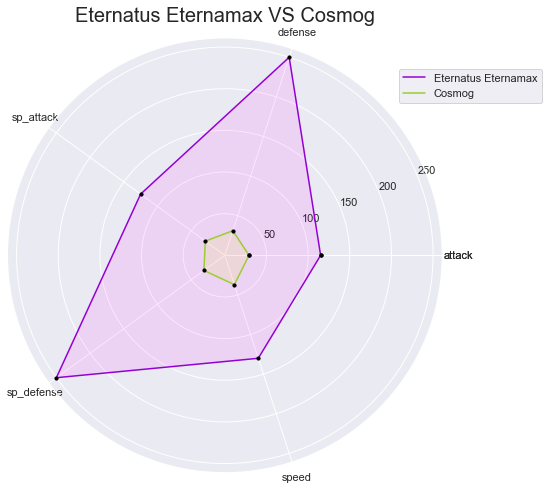

In [125]:
# Essenzialmente lo stesso processo di prima ma aggingo una ricerca solo per i pokemon 'Leggendari'

categories_to_query = [
    'name', 'total_points',
    'attack', 'defense',
    'sp_attack', 'sp_defense',
    'speed'
]

categories_to_show = ['attack', 'defense','sp_attack', 'sp_defense', 'speed']

# per il grafico radar, devo duplicare la prima categoria, in questo caso 'attack', e metterla al primo posto
# tutto ciò è per far chiudere il grafico
categories_to_show = [*categories_to_show, categories_to_show[0]]

# Raggruppo tutti i pokemon per 'status' (normale - mitico - sub leggendario - leggendario)
my_legendary2 = pd.DataFrame(filtered_pokemon_data.groupby("status")['name'])
# Aggiungo un filtro solo per i pokemon 'Leggendari' che va a controllare ogni entry del DF già filtrato
all_legendaries = filtered_pokemon_data[filtered_pokemon_data.status.isin(['Legendary'])]
all_legendaries_sorted = all_legendaries[categories_to_query].sort_values(by = 'total_points', ascending=False)

best_legendary = all_legendaries_sorted.head(1)
best_legendary_name = str(*best_legendary['name'])
best_legendary = best_legendary.drop(['name', 'total_points'], axis=1)
best_legendary = list(chain(*best_legendary.values))
# Sempre per poter "chiudere il grafico" qui non faccio altro che fare un append
# del primo valore ('attack') e lo metto come ultimo valore (chè quello, diciamo, invisibile per chiudere il grafico)
best_legendary.append(best_legendary[0])


worst_legendary = all_legendaries_sorted.tail(1)
worst_legendary_name = str(*worst_legendary['name'])
worst_legendary = worst_legendary.drop(['name', 'total_points'], axis=1)
worst_legendary = list(chain(*worst_legendary.values))
# Sempre per poter "chiudere il grafico" qui non faccio altro che fare un append
# del primo valore ('attack') e lo metto come ultimo valore (chè quello, diciamo, invisibile per chiudere il grafico)
worst_legendary.append(worst_legendary[0])




# Modo per disegnare il grafico
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show))
plt.figure(figsize=(8, 8))
ax2 = plt.subplot(polar=True)
ax2.plot(label_loc, best_legendary, label=best_legendary_name, color='darkviolet')
ax2.fill(label_loc, best_legendary, 'fuchsia', alpha=0.1)
ax2.plot(label_loc, worst_legendary,label=worst_legendary_name, color='yellowgreen')
ax2.fill(label_loc, worst_legendary, 'yellow', alpha=0.1)
plt.scatter(label_loc, best_legendary, s=10, color='black', zorder=10)
plt.scatter(label_loc, worst_legendary, s=10, color='black', zorder=10)
plt.title(f'{best_legendary_name} VS {worst_legendary_name}', size=20)
line, label = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.legend(loc=(0.9, 0.85))
plt.show()

#### Miglior e Peggior Pokémon "Normale"

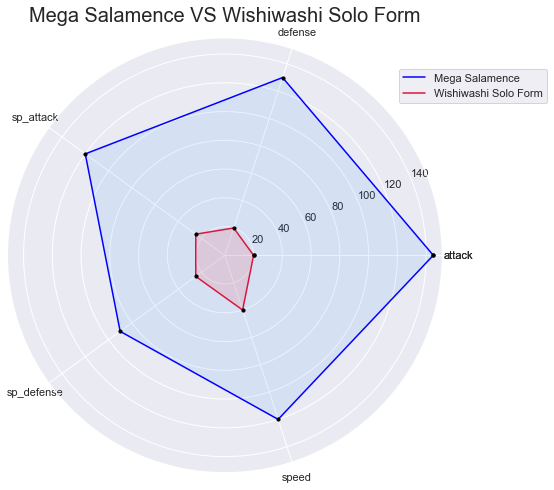

In [126]:
# Essenzialmente stessa cosa di prima ma per i pokemon 'normali'

my_normal_pokemon = pd.DataFrame(filtered_pokemon_data.groupby("status")['name'])

all_normal = filtered_pokemon_data[filtered_pokemon_data.status.isin(['Normal'])]
all_normal_sorted = all_normal[categories_to_query].sort_values(by = 'total_points', ascending=False)


best_normal = all_normal_sorted.head(1)
best_normal_name = str(*best_normal['name'])
best_normal = best_normal.drop(['name', 'total_points'], axis=1)
best_normal = list(chain(*best_normal.values))
best_normal.append(best_normal[0])


worst_normal = all_normal_sorted.tail(1)
worst_normal_name = str(*worst_normal['name'])
worst_normal = worst_normal.drop(['name', 'total_points'], axis=1)
worst_normal = list(chain(*worst_normal.values))
worst_normal.append(worst_normal[0])


# Modo per disegnare il grafico
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show))
plt.figure(figsize=(8, 8))
ax3 = plt.subplot(polar=True)
ax3.plot(label_loc, best_normal, label=best_normal_name, color='blue')
ax3.fill(label_loc, best_normal, 'dodgerblue', alpha=0.1)
ax3.plot(label_loc, worst_normal,label=worst_normal_name, color='crimson')
ax3.fill(label_loc, worst_normal, 'red', alpha=0.1)
plt.scatter(label_loc, best_normal, s=10, color='black', zorder=10)
plt.scatter(label_loc, worst_normal, s=10, color='black', zorder=10)

plt.title(f'{best_normal_name} VS {worst_normal_name}', size=20)
line_normal, label_normal = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.legend(loc=(0.9, 0.85))
plt.show()

#### Best Mythical Pokemon

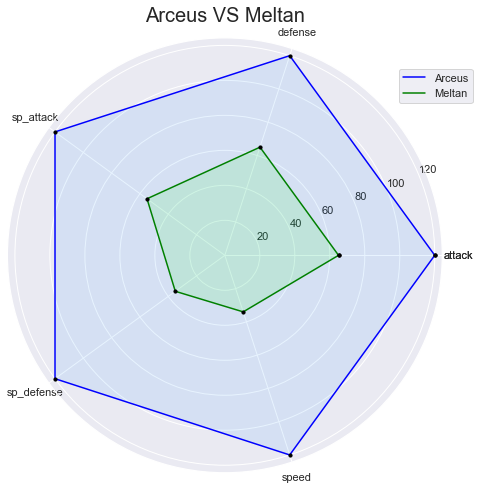

In [127]:
# Essenzialmente stessa cosa di prima ma per i pokemon 'mitici'
my_mythical_pokemon = pd.DataFrame(filtered_pokemon_data.groupby("status")['name'])

all_mythical = filtered_pokemon_data[filtered_pokemon_data.status.isin(['Mythical'])]
all_mythical_sorted = all_mythical[categories_to_query].sort_values(by = 'total_points', ascending=False)


best_mythical = all_mythical_sorted.head(1)
best_mythical_name = str(*list(best_mythical['name']))
best_mythical = best_mythical.drop(['name', 'total_points'], axis=1)
best_mythical = list(chain(*best_mythical.values))
best_mythical.append(best_mythical[0])


worst_mythical = all_mythical_sorted.tail(1)
worst_mythical_name = str(*list(worst_mythical['name']))
worst_mythical = worst_mythical.drop(['name', 'total_points'], axis=1)
worst_mythical = list(chain(*worst_mythical.values))
worst_mythical.append(worst_mythical[0])


# Modo per disegnare il grafico
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(categories_to_show))
plt.figure(figsize=(8, 8))
ax3 = plt.subplot(polar=True)
ax3.plot(label_loc, best_mythical, label=best_mythical_name, color='blue')
ax3.fill(label_loc, best_mythical, 'dodgerblue', alpha=0.1)
ax3.plot(label_loc, worst_mythical,label=worst_mythical_name, color='green')
ax3.fill(label_loc, worst_mythical, 'lime', alpha=0.1)
plt.scatter(label_loc, best_mythical, s=10, color='black', zorder=10)
plt.scatter(label_loc, worst_mythical, s=10, color='black', zorder=10)

plt.title(f'{best_mythical_name} VS {worst_mythical_name}', size=20)
line_mythical, label_mythical = plt.thetagrids(np.degrees(label_loc), labels=categories_to_show)
plt.legend(loc=(0.9, 0.85))
plt.show()

#### Comparare tutte le prime evoluzioni degli starter raggruppati per generazione
###### Sarebbe stato troppo dispendioso farlo anche per 2°evoluzione e 3°evoluzione
##### Calcoli:

In [128]:
categories_to_query_type = [
    'name', 'type_1', 'total_points',
    'attack', 'defense',
    'sp_attack', 'sp_defense',
    'speed'
]

# Creo un dizionario dove aggiungo per ogni generazione gli started (1st evolution)
my_generation_starter = {
    1: ['Bulbasaur', 'Squirtle', 'Charmander'],
    2: ['Chikorita', 'Totodile', 'Cyndaquil'],
    3: ['Treecko', 'Mudkip', 'Torchic'],
    4: ['Turtwig', 'Piplup', 'Chimchar'],
    5: ['Snivy', 'Oshawott', 'Tepig'],
    6: ['Chespin','Fennekin','Froakie'],
    7: ['Rowlet', 'Litten', 'Popplio'],
    8: ['Grookey', 'Scorbunny', 'Sobble']
}

starter_df= pd.DataFrame(my_generation_starter)
starter_df = starter_df.T

query_grass_starter = starter_df[0]
query_water_starter = starter_df[1]
query_fire_starter = starter_df[2]

# Mi creo un DataFrame con una maschera dove metto le mie categorie che voglio nel nuovo DF
my_filtered_df = filtered_pokemon_data[categories_to_query_type]


# Raggruppo tutti gli starters per tipo in delle variabili
my_grass_starters = my_filtered_df.loc[(my_filtered_df['name'].isin(query_grass_starter))]
my_fire_startes = my_filtered_df.loc[(my_filtered_df['name'].isin(query_fire_starter))]
my_water_startes = my_filtered_df.loc[(my_filtered_df['name'].isin(query_water_starter))]

# Creo un nuovo DF che sarà l'unione delle 3 variabili sopracitate
all_starters_merged = pd.concat([my_grass_starters, my_water_startes,
                my_fire_startes]).sort_index(kind='mergesort')


# grazie anche a Martino :)
def get_gen_name_and_points(df, start=0, end=0):
    current_gen = df[start:end]
    # faccio una lista dei valori nella colonna 'name'
    current_gen_name = list(current_gen['name'])
    # droppo le colonne che non mi interessano
    current_gen = current_gen.drop(['name', 'total_points', 'type_1'], axis=1)
    # metto in una lista i valori di 'attack' 'defense' 'sp_Attack' 'sp_defense' 'speed'
    current_gen = list(current_gen.values)
    # casto a lista i valori all'interno dell' array di NP
    current_gen_points = [[*l] for l in current_gen] 
    # per chiudere il grafico devo duplicare il primo valore
    for l in current_gen_points:
        l.append(l[0])
    
    return (current_gen_name, current_gen_points)


# ---------------------------FIRST GEN--------------------------------------------
# first_gen = all_starters_merged.head(3)
# first_gen = all_starters_merged[:3]
# first_gen_name = list(first_gen['name'])
# first_gen = first_gen.drop(['name', 'total_points', 'type_1'], axis=1)
# first_gen = list(first_gen.values)
# first_gen = [[*l] for l in first_gen] # ----->
# for l in first_gen:
#     l.append(l[0])
# [l.append(l[0]) for l in first_gen]
# first_gen = [[*first_gen[0]], [*first_gen[1]], [*first_gen[2]]]
# first_gen[1].append(first_gen[0][0])
# first_gen[1].append(first_gen[1][0])
# first_gen[2].append(first_gen[2][0])

first_gen_name, first_gen = get_gen_name_and_points(all_starters_merged, end=3)
# -------------------------END FIRST GEN------------------------------------------

# ---------------------------SECOND GEN--------------------------------------------
# second_gen = all_starters_merged[3:6]
# second_gen_name = list(chain(second_gen['name']))
# second_gen = second_gen.drop(['name', 'total_points', 'type_1'], axis=1)
# second_gen = list(second_gen.values)
# second_gen = [[*second_gen[i]] for i in range(len(second_gen))]
# [second_gen[i].append(second_gen[i][0]) for i in range(len(second_gen))]

second_gen_name, second_gen = get_gen_name_and_points(all_starters_merged, start=3, end=6)
# -------------------------END SECOND GEN------------------------------------------

# ---------------------------THIRD GEN--------------------------------------------
third_gen_name, third_gen = get_gen_name_and_points(all_starters_merged, start=6, end=9)
# -------------------------END THIRD GEN------------------------------------------

# ---------------------------FOURTH GEN--------------------------------------------
fourth_gen_name, fourth_gen = get_gen_name_and_points(all_starters_merged, start=9, end=12)
# -------------------------END FOURTH GEN------------------------------------------

# ---------------------------FIFTH GEN--------------------------------------------
fifth_gen_name, fifth_gen = get_gen_name_and_points(all_starters_merged, start=12, end=15)
# -------------------------END FIFTH GEN------------------------------------------

# ---------------------------SIXTH GEN--------------------------------------------
sixth_gen_name, sixth_gen = get_gen_name_and_points(all_starters_merged, start=15, end=18)
# -------------------------END SIXTH GEN------------------------------------------

# ---------------------------SEVENTH GEN--------------------------------------------
seventh_gen_name, seventh_gen = get_gen_name_and_points(all_starters_merged, start=18, end=21)
# -------------------------END SEVENTH GEN------------------------------------------

# ---------------------------EIGHTH GEN--------------------------------------------
eighth_gen_name, eighth_gen = get_gen_name_and_points(all_starters_merged, start=21, end=24)
# -------------------------END EIGHTH GEN------------------------------------------

##### Grafici

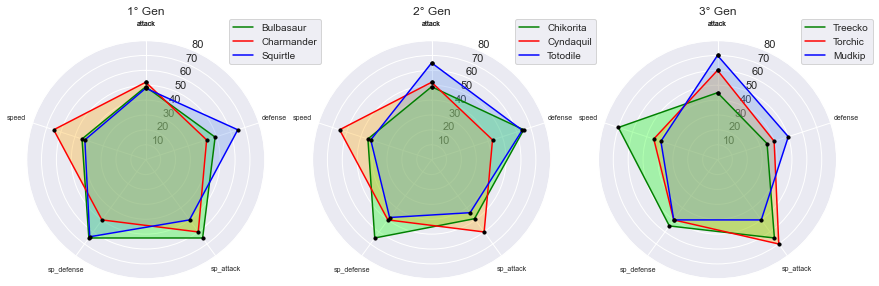

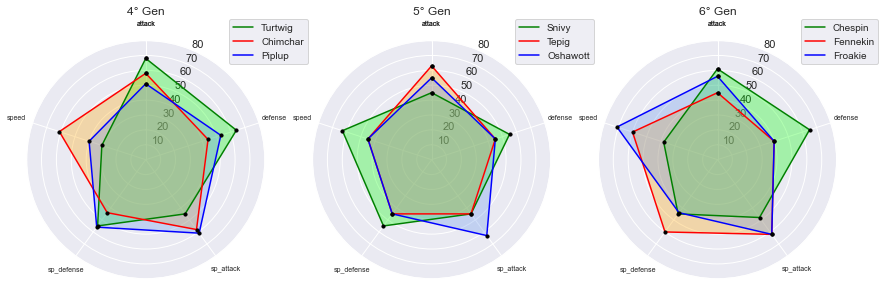

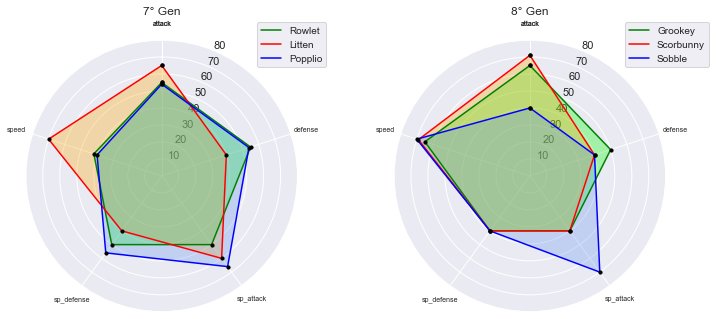

In [129]:
# Creo una tupla che uso per definire i colori delle linee nel grafico
color = ('green', 'red', 'blue')
# Creo una tupla che uso per definire i colori che userò come filler nel grafico
fill_color = ('lime', 'orange', 'cornflowerblue')
# Creo il diesgno del grafico
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories_to_show))

# Faccio un dizionario per le prime 3 entry del primo gruppo di plot
one_to_three = {
    1: [*first_gen, first_gen_name],
    2: [*second_gen, second_gen_name],
    3: [*third_gen, third_gen_name],
}
# Faccio un dizionario per le prime 3 entry del secondo gruppo di plot
fourth_to_sixth = {
    1: [*fourth_gen, fourth_gen_name],
    2: [*fifth_gen, fifth_gen_name],
    3: [*sixth_gen, sixth_gen_name],
}
# Faccio un dizionario per le prime 2 entry del terzo gruppo di plot
seventh_to_eighth = {
    1: [*seventh_gen, seventh_gen_name],
    2: [*eighth_gen, eighth_gen_name],
}

# Definisco una funzione che preso il dizionario, il titolo, e di default una tupla per colori e colori di riempimento che
# riempie un subplot con massimo 3 grafici (per renderlo leggibile)
def draw(my_dic, title=(), color=color, filler=fill_color):
    for i in range(len(my_dic)):
        for j in range(3):
            ax[i].plot(label_loc, my_dic[i+1][j], label=my_dic[i+1][3][j], color=color[j])
            ax[i].fill(label_loc, my_dic[i+1][j], filler[j], alpha=0.3)
            ax[i].scatter(label_loc, my_dic[i+1][j],s=10, color='black', zorder=10)
            ax[i].set_thetagrids(np.degrees(label_loc),labels=categories_to_show, fontsize=7)
            ax[i].set_theta_offset(np.pi / 2)
            ax[i].set_theta_direction(-1)
            ax[i].set_ylim(0, 80)
            ax[i].legend(loc=(0.85, 0.9), fontsize=10)
            fig.subplots_adjust(right=2)
        ax[i].set_title(f'{title[i]}° Gen')
    return(ax)


# Creo il primo subplot con 1 riga e 3 colonne (dove andranno le prime 3 generazioni (1,2,3))
fig, (ax) = plt.subplots(1, 3, figsize=(6, 6),subplot_kw=dict(projection='polar'))
draw(one_to_three, ('1', '2', '3'))
# Creo il secondo subplot con 1 riga e 3 colonne(dove andranno le seconde 3 generazioni (4,5,6))
fig, (ax) = plt.subplots(1, 3, figsize=(6, 6),subplot_kw=dict(projection='polar'))
draw(fourth_to_sixth, ('4', '5', '6'))
# Creo il terzo subplot con 1 riga e 2 colonne(dove andranno le ultime 2 generazioni (7,8))
fig, (ax) = plt.subplots(1, 2, figsize=(5, 5),subplot_kw=dict(projection='polar'))
draw(seventh_to_eighth, ('7', '8'))
plt.show()

#### Distribuzione della quantità di pokemon per Exp totale per arrivare al lv. 100'

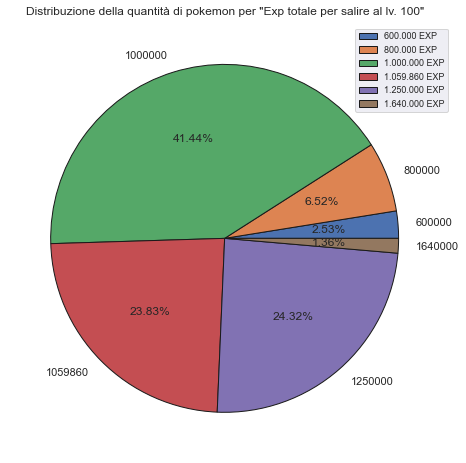

In [130]:
# Prendo il dataframe e filtro solo per le colonne che mi interessano
s_with_exp = filtered_pokemon_data[['pokedex_number' ,'name', 'Experience to level 100']]
# creo un nuovo dataframe con solo la colonna 'Experience to level 100', conto i valori e ordino per indice
df_count = pd.DataFrame(s_with_exp['Experience to level 100'].value_counts().sort_index())
# resetto l'indice
df_count = df_count.reset_index()
# rinomino le colonne
df_count.rename(columns={'index': 'exp_number', 'Experience to level 100': 'exp_to_100'}, inplace=True)
plt.figure(figsize=(8, 8))
plt.title('Distribuzione della quantità di pokemon per "Exp totale per salire al lv. 100"')
plt.pie(df_count.exp_to_100, labels=df_count.exp_number, autopct='%1.2f%%', wedgeprops={"edgecolor": "k", 'linewidth': 1, 'antialiased': True})
plt.legend(['600.000 EXP', '800.000 EXP', '1.000.000 EXP', '1.059.860 EXP', '1.250.000 EXP', '1.640.000 EXP'], fontsize=9, loc=(0.80, 0.79))
plt.show()

#### Quanti Pokémon hanno "Hidden Ability"

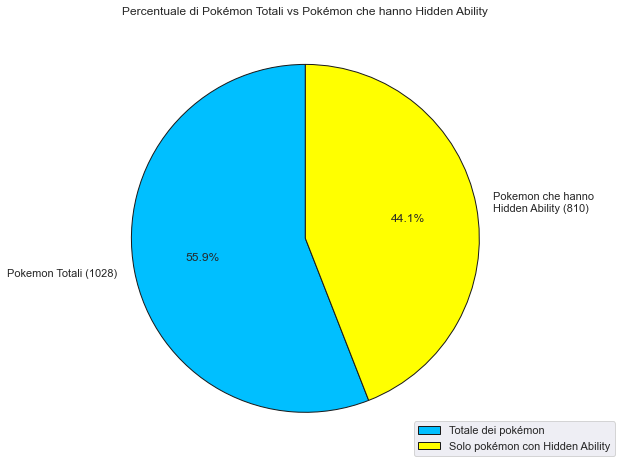

In [131]:
# Prendo il dataframe ed elimino le entry dove nella colonna 'ability_hidden' non ci sono valori (NaN)
dropped = filtered_pokemon_data.ability_hidden.dropna()
# conto quanti pokemon hanno hidden ability, dalla maschera appena creata
only_ability = dropped.count()
# metto in una lista il numero di quanti sono tutti i pokemon e quanti solo con hidden_ability
data = [filtered_pokemon_data.pokedex_number.count(), only_ability]
label_graph = [f'Pokemon Totali ({filtered_pokemon_data.pokedex_number.count()})', f'Pokemon che hanno \nHidden Ability ({only_ability})']
plt.figure(figsize=(8, 8))
plt.title('Percentuale di Pokémon Totali vs Pokémon che hanno Hidden Ability')
plt.pie(data, labels=label_graph, autopct='%1.1f%%', startangle=90, wedgeprops={
        "edgecolor": "k", 'linewidth': 1, 'antialiased': True}, colors=['deepskyblue', 'yellow'])
plt.legend(['Totale dei pokémon', 'Solo pokémon con Hidden Ability'], loc=(0.75, 0))
plt.show()

#### Vedendo se Bellsprout è più forte di Lugia (total points compared)

In [132]:
lugia = filtered_pokemon_data.loc[filtered_pokemon_data['name'].str.contains(
    'Lugia')].total_points

bellsprout = filtered_pokemon_data.loc[filtered_pokemon_data['name'].str.contains(
    'Bellsprout')].total_points

lugia_only = np.array(lugia)
bellsprout_only = np.array(bellsprout)

print("Bellsprout è più debole di Lugia") if np.greater([bellsprout_only], [
    lugia_only]) == False else print("Bellsprout è più forte di Lugia")

Bellsprout è più debole di Lugia


#### Esportazione SQL
##### DataFrame --> SQL || SQL --> DataFrame || DataFrame --> CSV

In [133]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

df_to_db = filtered_pokemon_data[['pokedex_number', 'name', 'date_published', 'generation', 'status', 'total_points', 'catch_rate']]

df_to_db.to_sql('Pokedex_Up_To_8th_Gen', con=engine)
df_db_query = pd.DataFrame(engine.execute("SELECT * FROM Pokedex_Up_To_8th_Gen WHERE catch_rate > 50").fetchall())
df_db_CSV = df_db_query.to_csv('CSV/sql_to_csv.csv', index=False)